<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/220805_%EC%A4%91%EA%B3%A0%EC%B0%A8_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1(%ED%9A%8C%EA%B7%80%ED%8A%B8%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 니차 팔땐? 중고차 가격 예측
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
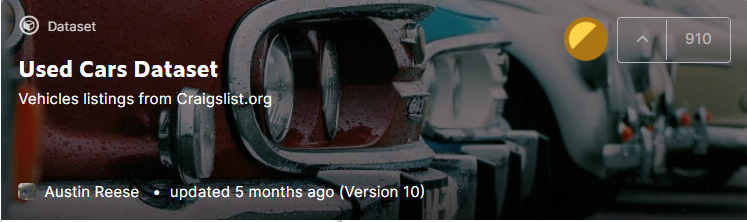
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data
    
## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 제조년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    



## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - XGBoost, LightGBM 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

---

## Step 1. 데이터셋 준비하기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [3]:
import os

In [5]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'dpyang22'
os.environ['KAGGLE_KEY'] = '1ae23befe07729025461c9680ceb1f97'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [6]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d austinreese/craigslist-carstrucks-data

 98% 257M/262M [00:01<00:00, 132MB/s]
100% 262M/262M [00:01<00:00, 141MB/s]


In [7]:
!unzip '*.zip'

Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [8]:
df = pd.read_csv('/content/vehicles.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기
# 'year' 컬럼을 'age' 컬럼으로 변경하기
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
# 각 컬럼 마다 널값의 수 카운트
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [ ]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [9]:
df.drop(['id','url','region_url','title_status','VIN','image_url',
         'description','county','state','lat','long','posting_date'],
        axis=1, inplace=True)

In [10]:
df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 문제 5. 범주형 데이터의 통계 분석하기

In [12]:
df['region'].value_counts()

columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: region, Length: 404, dtype: int64

In [13]:
df['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [ ]:
len(df['manufacturer'].value_counts())

42

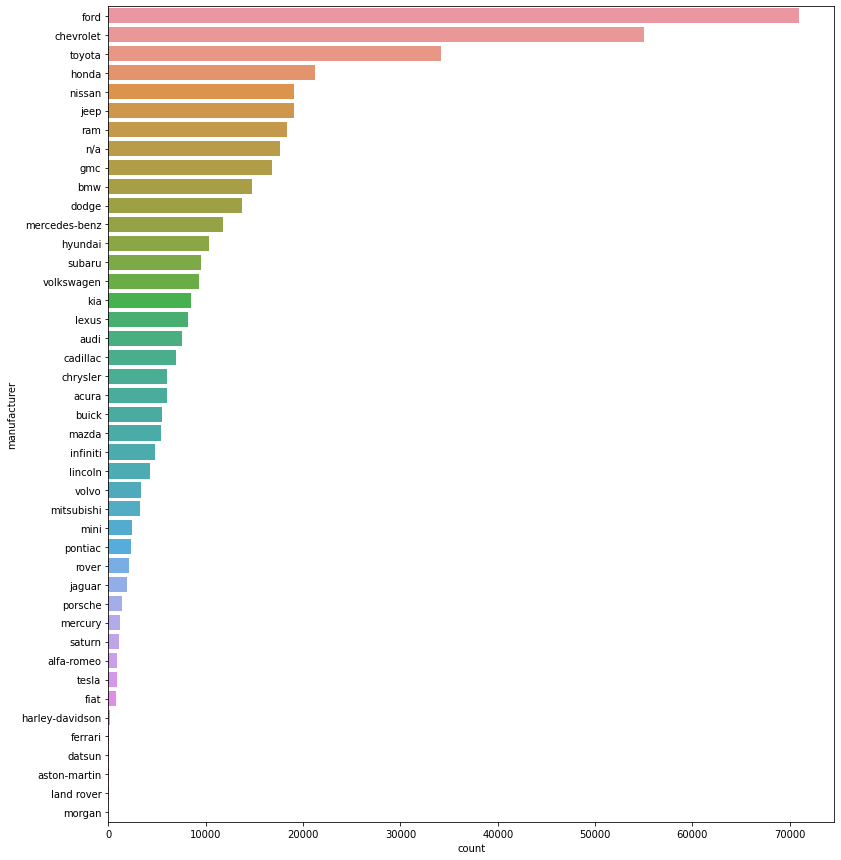

In [ ]:
fig = plt.figure(figsize=(13, 15))
sns.countplot(y='manufacturer', data=df.fillna('n/a'), 
              order=df.fillna('n/a')['manufacturer'].value_counts().index)

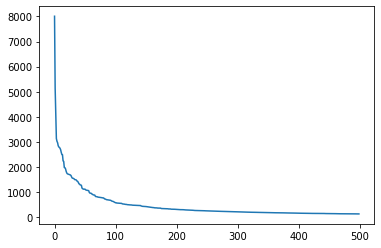

In [ ]:
plt.plot(range(len(df['model'].value_counts()[:500])),
         df['model'].value_counts()[:500])

In [ ]:
# 자동차 모델명 카운트
df['model'].value_counts()

f-150                       8009
silverado 1500              5140
1500                        4211
camry                       3135
silverado                   3023
                            ... 
Huyndai Sante Fe Limited       1
astro awd 4x4                  1
escalade and                   1
cx 3                           1
Paige Glenbrook Touring        1
Name: model, Length: 29667, dtype: int64

In [ ]:
df['condition'].value_counts()

good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64

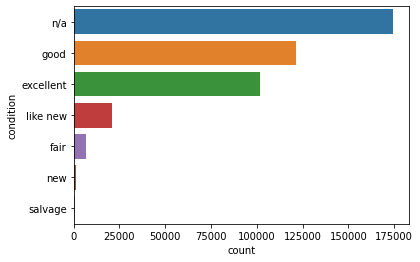

In [ ]:
# 자동차 상태 카운트 및 시각화
sns.countplot(y='condition', 
              data=df.fillna('n/a'), 
              order=df.fillna('n/a')['condition'].value_counts().index)

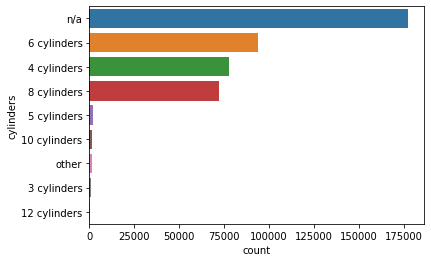

In [ ]:
# 자동차 기통수 시각화
sns.countplot(y='cylinders', 
              data=df.fillna('n/a'), 
              order=df.fillna('n/a')['cylinders'].value_counts().index)

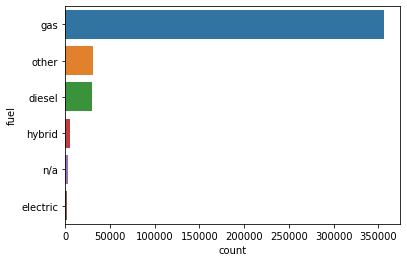

In [ ]:
# 자동차의 연료 타입 시각화
sns.countplot(y='fuel', 
              data=df.fillna('n/a'), 
              order=df.fillna('n/a')['fuel'].value_counts().index)

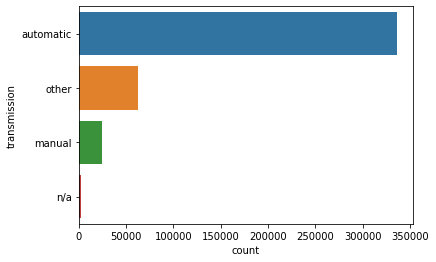

In [ ]:
# 트랜스미션 종류 타입 시각화
sns.countplot(y='transmission', 
              data=df.fillna('n/a'), 
              order=df.fillna('n/a')['transmission'].value_counts().index)

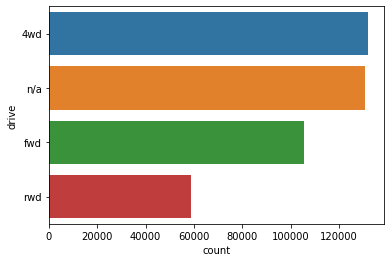

In [ ]:
# 자동차의 구동 타입 시각화
sns.countplot(y='drive', 
              data=df.fillna('n/a'), 
              order=df.fillna('n/a')['drive'].value_counts().index)

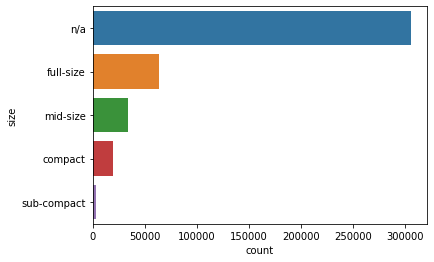

In [ ]:
# 자동차 크기 시각화
sns.countplot(y='size', 
              data=df.fillna('n/a'), 
              order=df.fillna('n/a')['size'].value_counts().index)

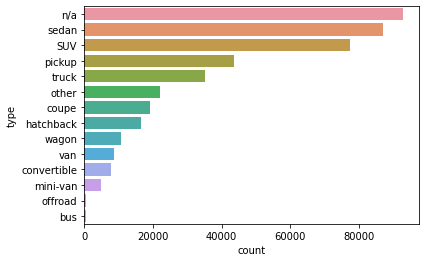

In [ ]:
# 자동차 type 시각화
sns.countplot(y='type', 
              data=df.fillna('n/a'), 
              order=df.fillna('n/a')['type'].value_counts().index)

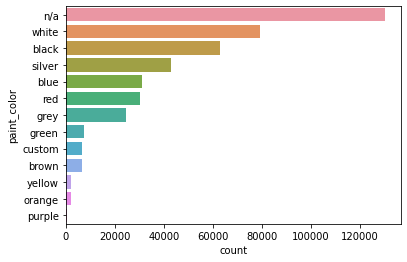

In [ ]:
# 자동차 자동차 색상 시각화
sns.countplot(y='paint_color', 
              data=df.fillna('n/a'), 
              order=df.fillna('n/a')['paint_color'].value_counts().index)

### 문제 6. 수치형 데이터의 통계 분석하기

In [ ]:
df['price'].max()

3736928711

In [ ]:
df['price'].min()

0

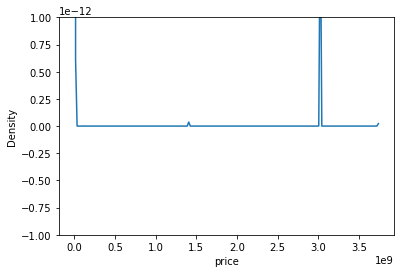

In [ ]:
sns.kdeplot(x=df['price'])

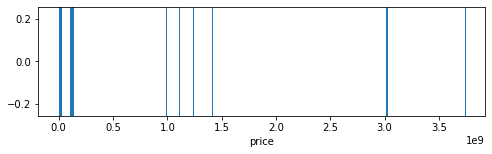

In [ ]:
# 수치형 데이터의 값의 범위, 기초 통계 분석하기
# rugplot: 실수 분포 플롯. 자료의 분포를 묘사하기 위한 것으로 
# 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터의 위치를 보여준다.
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

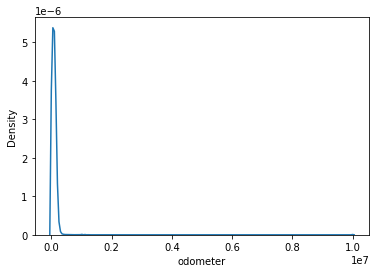

In [ ]:
# 주행기록
sns.kdeplot(x=df['odometer'])

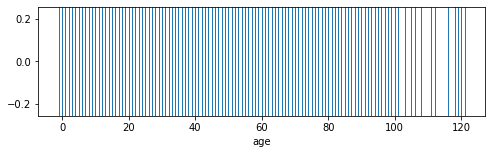

In [ ]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='age', data=df, height=1)

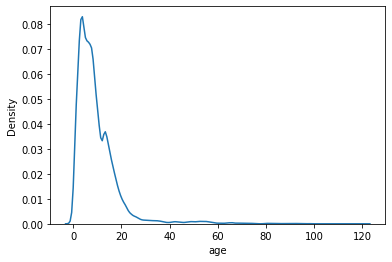

In [ ]:
sns.kdeplot(x=df['age'])

In [ ]:
print(df['price'].quantile(0.95))
print(df['price'].quantile(0.1))

44500.0
500.0


In [14]:
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.1)

In [15]:
df = df[(p1 > df['price']) & (df['price'] > p2)]

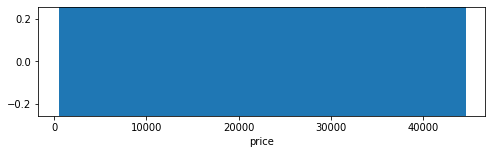

In [16]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=1)

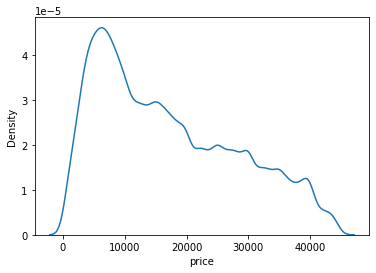

In [17]:
sns.kdeplot(x=df['price'])

In [18]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

280000.0 17273.0


In [19]:
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]

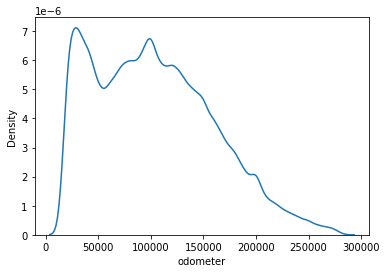

In [20]:
sns.kdeplot(x=df['odometer'])

In [21]:
df.isna().sum()

region               0
price                0
manufacturer     10946
model             3214
condition       121779
cylinders       123638
fuel              1942
odometer             0
transmission      1247
drive            95299
size            222903
type             70112
paint_color      92213
age                420
dtype: int64

In [ ]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
27,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,NaN,pickup,white,7.0
28,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,NaN,pickup,blue,11.0
29,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,NaN,pickup,red,1.0
30,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,NaN,pickup,red,4.0
31,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,8.0


### 범주형 데이터의 통계 분석하기

In [ ]:
### 범주형 데이터의 통계 분석하기

In [22]:
manu_count = df['manufacturer'].value_counts()
manu_count.sort_values(ascending = False, inplace=True)
manu_count

ford               51944
chevrolet          40751
toyota             27307
honda              17669
nissan             15200
jeep               14569
gmc                11986
bmw                11972
ram                11893
dodge               9941
mercedes-benz       8565
hyundai             8054
subaru              7814
volkswagen          7188
lexus               6715
kia                 6454
audi                6088
chrysler            5104
cadillac            5002
acura               4472
buick               4075
mazda               3899
infiniti            3780
lincoln             3137
volvo               2584
mitsubishi          2280
pontiac             2045
mini                1957
rover               1472
jaguar              1254
mercury             1018
saturn               993
porsche              970
fiat                 527
alfa-romeo           512
tesla                508
harley-davidson       70
datsun                56
land rover             9
ferrari                6


In [25]:
manu_idx = manu_count.index[7:]
manu_idx

Index(['bmw', 'ram', 'dodge', 'mercedes-benz', 'hyundai', 'subaru',
       'volkswagen', 'lexus', 'kia', 'audi', 'chrysler', 'cadillac', 'acura',
       'buick', 'mazda', 'infiniti', 'lincoln', 'volvo', 'mitsubishi',
       'pontiac', 'mini', 'rover', 'jaguar', 'mercury', 'saturn', 'porsche',
       'fiat', 'alfa-romeo', 'tesla', 'harley-davidson', 'datsun',
       'land rover', 'ferrari', 'aston-martin', 'morgan'],
      dtype='object')

In [26]:
df = df.reset_index()

In [27]:
df.head()

,index,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,27,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,NaN,pickup,white,7.0
1,28,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,NaN,pickup,blue,11.0
2,29,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,NaN,pickup,red,1.0
3,30,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,NaN,pickup,red,4.0
4,31,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,8.0


In [28]:
del df['index']

In [29]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,NaN,pickup,white,7.0
1,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,NaN,pickup,blue,11.0
2,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,NaN,pickup,red,1.0
3,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,NaN,pickup,red,4.0
4,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,8.0


In [30]:
df['manufacturer'].fillna('other', inplace=True) # df['manufacturer']에 있는 NaN 값을 'others'로 변경
# df['manufacturer']의 컬럼의 값이 manu_idx에 있는 데이터는 'others'로 변경
for num in range(len(df['manufacturer'])):
  if str(df.iloc[num]['manufacturer']) in manu_idx:
    df.at[num,'manufacturer'] = 'other'

In [31]:
df.head()

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,age
0,auburn,33590,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,NaN,pickup,white,7.0
1,auburn,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,NaN,pickup,blue,11.0
2,auburn,39590,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,NaN,pickup,red,1.0
3,auburn,30990,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,NaN,pickup,red,4.0
4,auburn,15000,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black,8.0


In [32]:
df.isna().sum()

region               0
price                0
manufacturer         0
model             3214
condition       121779
cylinders       123638
fuel              1942
odometer             0
transmission      1247
drive            95299
size            222903
type             70112
paint_color      92213
age                420
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320791 entries, 0 to 320790
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        320791 non-null  object 
 1   price         320791 non-null  int64  
 2   manufacturer  320791 non-null  object 
 3   model         317577 non-null  object 
 4   condition     199012 non-null  object 
 5   cylinders     197153 non-null  object 
 6   fuel          318849 non-null  object 
 7   odometer      320791 non-null  float64
 8   transmission  319544 non-null  object 
 9   drive         225492 non-null  object 
 10  size          97888 non-null   object 
 11  type          250679 non-null  object 
 12  paint_color   228578 non-null  object 
 13  age           320371 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 34.3+ MB


In [34]:
df['manufacturer'].value_counts()

other        141365
ford          51944
chevrolet     40751
toyota        27307
honda         17669
nissan        15200
jeep          14569
gmc           11986
Name: manufacturer, dtype: int64

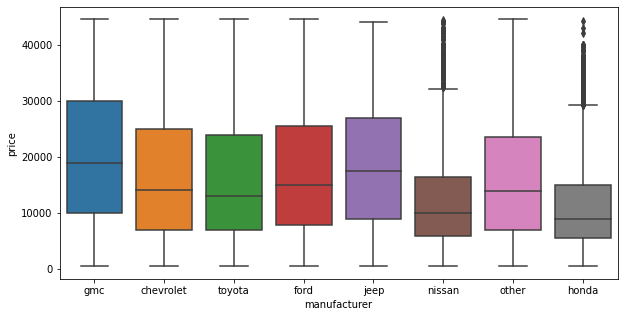

In [35]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='manufacturer', y='price', data=df)

In [36]:
from tqdm.notebook import tqdm

model_count = df['model'].value_counts()
model_count.sort_values(ascending = False, inplace=True)
model_idx = model_count.index[14:]
df['model'].fillna('other', inplace=True) # df['model']에 있는 NaN 값을 'other'로 변경

# df['model']의 컬럼의 값이 model_idx에 있는 데이터는 'other'로 변경
for num in tqdm(range(len(df['model']))):
  if str(df.iloc[num]['model']) in model_idx:
    df.at[num,'model'] = 'other'

  0%|          | 0/320791 [00:00<?, ?it/s]

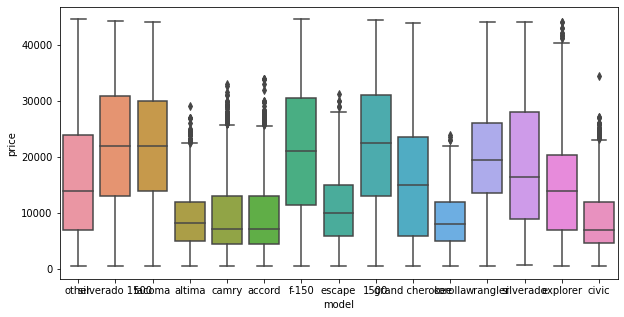

In [37]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='model', y='price', data=df)

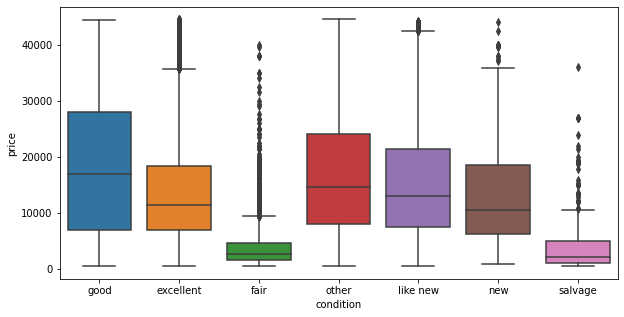

In [38]:
df['condition'].fillna('other', inplace=True) # df['condition']에 있는 NaN 값을 'others'로 변경
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='condition', y='price', data=df)

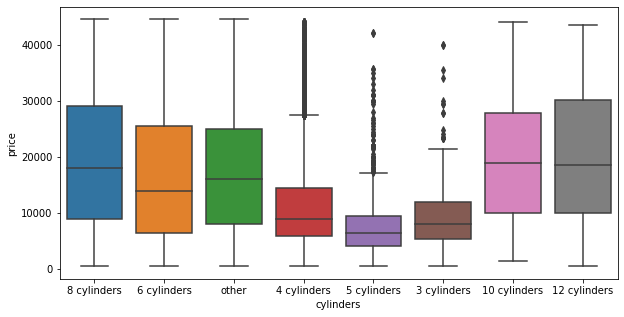

In [39]:
df['cylinders'].fillna('other', inplace=True) # df['cylinders']에 있는 NaN 값을 'others'로 변경
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='cylinders', y='price', data=df)

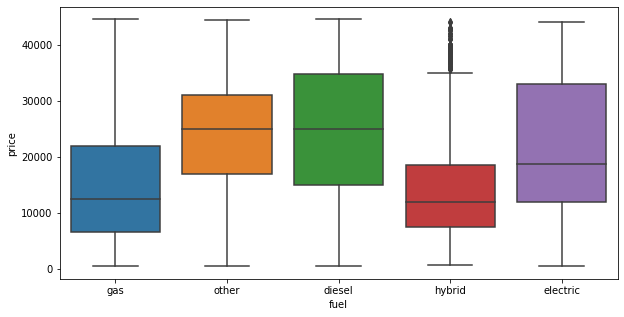

In [40]:
df['fuel'].fillna('other', inplace=True) # df['fuel']에 있는 NaN 값을 'others'로 변경
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='fuel', y='price', data=df)

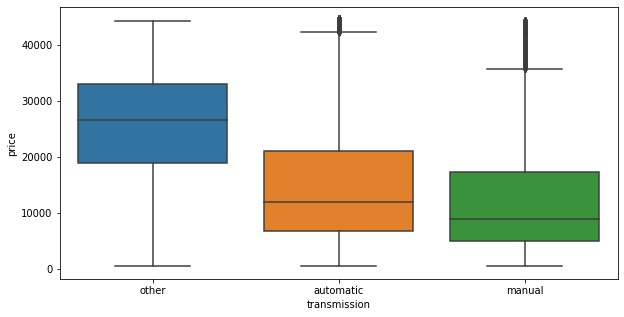

In [41]:
df['transmission'].fillna('other', inplace=True) # df['transmission']에 있는 NaN 값을 'others'로 변경
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='transmission', y='price', data=df)

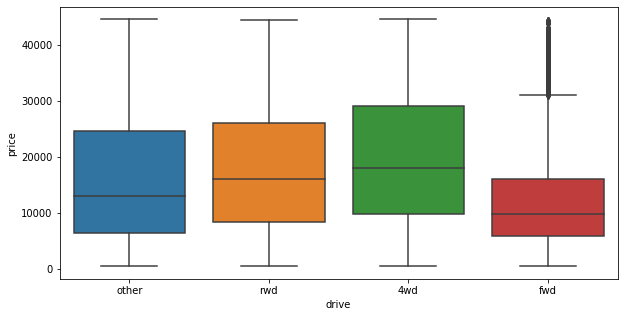

In [42]:
df['drive'].fillna('other', inplace=True) # df['transmission']에 있는 NaN 값을 'others'로 변경
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='drive', y='price', data=df)

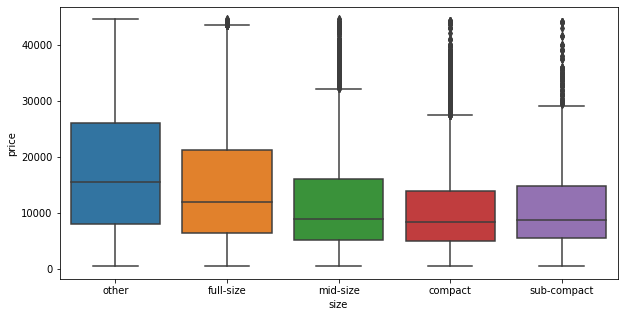

In [43]:
df['size'].fillna('other', inplace=True) # df['transmission']에 있는 NaN 값을 'others'로 변경
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='size', y='price', data=df)

In [44]:
from tqdm.notebook import tqdm

type_count = df['type'].value_counts()
type_count.sort_values(ascending = False, inplace=True)
type_idx = type_count.index[5:]
df['type'].fillna('other', inplace=True) # df['type']에 있는 NaN 값을 'others'로 변경

# df['type']의 컬럼의 값이 type_idx에 있는 데이터는 'others'로 변경
for num in tqdm(range(len(df['type']))):
  if str(df.iloc[num]['type']) in type_idx:
    df.at[num,'type'] = 'other'

  0%|          | 0/320791 [00:00<?, ?it/s]

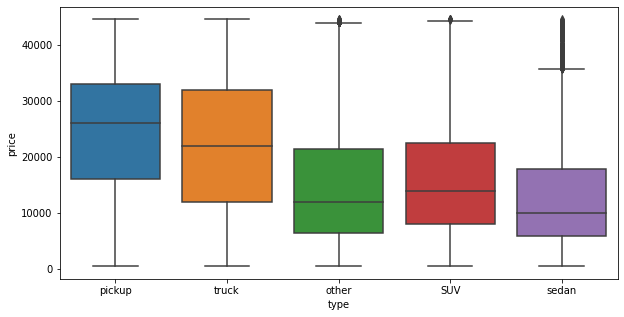

In [45]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y='price', data=df)

In [46]:
from tqdm.notebook import tqdm

color_count = df['paint_color'].value_counts()
color_count.sort_values(ascending = False, inplace=True)
color_idx = color_count.index[6:]
df['paint_color'].fillna('other', inplace=True) # df['color']에 있는 NaN 값을 'others'로 변경

# df['color']의 컬럼의 값이 color_idx에 있는 데이터는 'other'로 변경
for num in tqdm(range(len(df['paint_color']))):
  if str(df.iloc[num]['paint_color']) in color_idx:
    df.at[num,'paint_color'] = 'other'

  0%|          | 0/320791 [00:00<?, ?it/s]

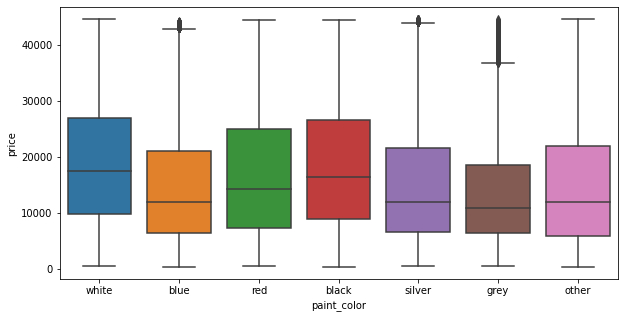

In [47]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='paint_color', y='price', data=df)

In [48]:
df.isna().sum()

region            0
price             0
manufacturer      0
model             0
condition         0
cylinders         0
fuel              0
odometer          0
transmission      0
drive             0
size              0
type              0
paint_color       0
age             420
dtype: int64

In [49]:
df.dropna(inplace=True)# age에 있는 NaN을 삭제하기 위함

In [50]:
df.isna().sum()

region          0
price           0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
size            0
type            0
paint_color     0
age             0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320371 entries, 0 to 320790
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        320371 non-null  object 
 1   price         320371 non-null  int64  
 2   manufacturer  320371 non-null  object 
 3   model         320371 non-null  object 
 4   condition     320371 non-null  object 
 5   cylinders     320371 non-null  object 
 6   fuel          320371 non-null  object 
 7   odometer      320371 non-null  float64
 8   transmission  320371 non-null  object 
 9   drive         320371 non-null  object 
 10  size          320371 non-null  object 
 11  type          320371 non-null  object 
 12  paint_color   320371 non-null  object 
 13  age           320371 non-null  float64
dtypes: float64(2), int64(1), object(11)
memory usage: 36.7+ MB


In [52]:
df.to_csv('./니차팔때.csv')

## Step 4. 모델 학습을 위한 데이터 전처리

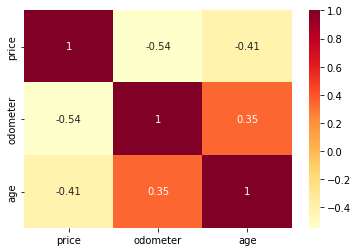

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

In [ ]:
df.describe()

,price,odometer,age
count,320371.000000,320371.000000,320371.000000
mean,16105.658817,103694.999922,10.483165
std,10781.490969,56493.209733,8.454060
min,501.000000,17275.000000,-1.000000
25%,6997.000000,56779.000000,5.000000
50%,13900.000000,99366.000000,8.000000
75%,23950.000000,142647.500000,13.000000
max,44499.000000,279974.000000,121.000000


### 문제 12.수치형 데이터 표준화하기

In [53]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler # 스케일링은 수치형 데이터에 한에서 진행

In [54]:
# 스케일링을 진행할 데이터를 선택
X_num = df[['odometer', 'age']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num) # Scaler는 fit과 transform이 셋트다.
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, 
                        columns=X_num.columns)

In [55]:
X_scaled.head()

,odometer,age
0,-0.810223,-0.412012
1,-0.574689,0.061135
2,-1.496377,-1.121731
3,-1.107586,-0.766871
4,0.430229,-0.293725


### 문제13. 범주형 데이터 원-핫 인코딩

In [56]:
# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat = df.drop(['price', 'odometer', 'age'], axis=1)
X_cat = pd.get_dummies(X_cat)
X_cat.head()

,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,region_anchorage / mat-su,region_ann arbor,...,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_grey,paint_color_other,paint_color_red,paint_color_silver,paint_color_white
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [57]:
# 입출력 데이터 통합하기
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [58]:
X.head()

,odometer,age,region_SF bay area,region_abilene,region_akron / canton,region_albany,region_albuquerque,region_altoona-johnstown,region_amarillo,region_ames,...,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_grey,paint_color_other,paint_color_red,paint_color_silver,paint_color_white
0,-0.810223,-0.412012,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,-0.574689,0.061135,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,-1.496377,-1.121731,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,-1.107586,-0.766871,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.430229,-0.293725,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [59]:
X.shape

(320371, 473)

### 문제 14. 학습데이터와 테스트데이터 분리하기

In [ ]:
# 비율은 7:3, random_state는 1
from sklearn.model_selection import train_test_split

# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1)

## Step 5. Regression 모델 학습하기

### 문제15. 선형회귀 학습 및 평가

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

In [ ]:
# LinearRegression 모델 생성/학습
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
lr_pred = lr_reg.predict(X_test)

In [ ]:
print('MAE', mean_absolute_error(y_test, lr_pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, lr_pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, lr_pred))) # 평균제곱근오차
print('R2', r2_score(y_test, lr_pred)) # R2 스코어

MAE 4984.887722136674
MSE 44538906.83118296
RMSE 6673.747585216492
R2 0.6169228016203105


## 회귀 트리

In [60]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import time

In [61]:
def get_model_cv_prediction(model, X_data, y_target):
  start_time = time.time()
  neg_mse_scores = cross_val_score(model, X_data, y_target,
                                   scoring = 'neg_mean_squared_error', cv=5)
  rmse_scores = np.sqrt(-1 * neg_mse_scores)
  avg_rmse = np.mean(rmse_scores)

  print('#####', model.__class__.__name__, '#####')
  print('실행시간{0:.0f}초'.format(time.time() - start_time))
  print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))
  print("")

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings(action='ignore')
dt_reg = DecisionTreeRegressor(max_depth=4)
rf_reg = RandomForestRegressor( n_estimators = 100, n_jobs = -1)
gb_reg = GradientBoostingRegressor( n_estimators = 100)
xgb_reg = XGBRegressor(n_estimators = 100, n_jobs = -1)
lgb_reg = LGBMRegressor(n_estimators = 100, n_jobs = -1)


# 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
  get_model_cv_prediction(model, X, y)

##### DecisionTreeRegressor #####
실행시간24초
5 교차 검증의 평균 RMSE : 7233.881

##### RandomForestRegressor #####
실행시간4549초
5 교차 검증의 평균 RMSE : 4716.594

##### GradientBoostingRegressor #####
실행시간906초
5 교차 검증의 평균 RMSE : 5752.738

[03:33:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:37:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:40:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:43:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:46:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##### XGBRegressor #####
실행시간948초
5 교차 검증의 평균 RMSE : 5755.060

##### LGBMRegressor #####
실행시간28초
5 교차 검증의 평균 RMSE : 5366.658



In [73]:
from sklearn.model_selection import train_test_split
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=1)

In [74]:
start_time = time.time()

dt_reg.fit(X_train, y_train)
dt_pred = dt_reg.predict(X_test)

rf_reg.fit(X_train, y_train)
rf_pred = rf_reg.predict(X_test)

gb_reg.fit(X_train, y_train)
gb_pred = gb_reg.predict(X_test)

xgb_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)

lgb_reg.fit(X_train, y_train)
lgb_pred = lgb_reg.predict(X_test)

print(' 실행시간 {0:.0f}초'.format(time.time() - start_time))

[04:16:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
 실행시간 1283초


#### DecisionTree 결과

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
print('#####' ,dt_reg.__class__.__name__ ,' ######')
print('MAE', mean_absolute_error(y_test, rf_pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, rf_pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, rf_pred))) # 평균제곱근오차
print('R2', r2_score(y_test, rf_pred)) # R2 스코어

##### DecisionTreeRegressor  ######
MAE 2115.083630696099
MSE 14859673.621519001
RMSE 3854.824719947588
R2 0.8721925941886238


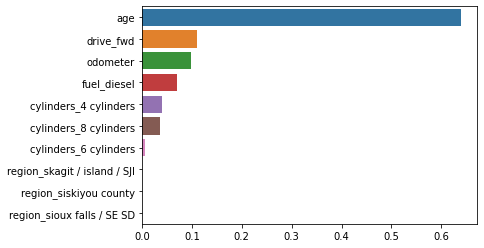

In [76]:
# 특성중요도 파악하기
feature_series = pd.Series(data=dt_reg.feature_importances_, index=X.columns )
feature_series = feature_series.sort_values(ascending=False)[:10]
sns.barplot(x= feature_series, y=feature_series.index)

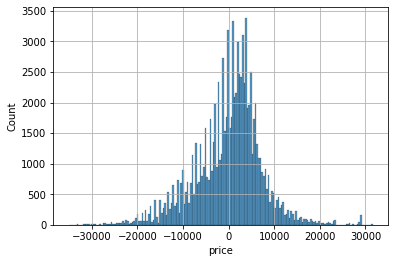

In [77]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = dt_pred - y_test
sns.histplot(err)
plt.grid()

#### 랜덤포레스트 결과

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
print('#####' ,rf_reg.__class__.__name__ ,' ######')
print('MAE', mean_absolute_error(y_test, rf_pred)) # 평균절대값오차
print('MSE', mean_squared_error(y_test, rf_pred))  # 평균제곱오차
print('RMSE', sqrt(mean_squared_error(y_test, rf_pred))) # 평균제곱근오차
print('R2', r2_score(y_test, rf_pred)) # R2 스코어

##### RandomForestRegressor  ######
MAE 2115.083630696099
MSE 14859673.621519001
RMSE 3854.824719947588
R2 0.8721925941886238


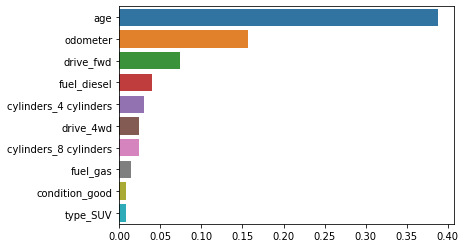

In [79]:
# 특성중요도 파악하기
feature_series = pd.Series(data=rf_reg.feature_importances_, index=X.columns )
feature_series = feature_series.sort_values(ascending=False)[:10]
sns.barplot(x= feature_series, y=feature_series.index)

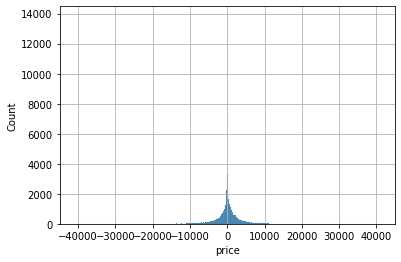

In [80]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = rf_pred - y_test
sns.histplot(err)
plt.grid()

#### GB 결과

#### XGB 결과

#### LGBM 결과